# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('b1abb33c4f.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [24]:
# criando coluna categorizado do APGAR5 chamado APGAR5_CAT
df.loc[df['APGAR5'] <= 3, 'APGAR5_CAT'] = 'asfixia grave'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5), 'APGAR5_CAT'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <= 7), 'APGAR5_CAT'] = 'asfixia leve'
df.loc[(df['APGAR5'] >= 8) & (df['APGAR5'] <= 10), 'APGAR5_CAT'] = 'normal'

In [27]:
df[['APGAR5', 'APGAR5_CAT']].head(50)

,APGAR5,APGAR5_CAT
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal
5,10.0,normal
6,10.0,normal
7,10.0,normal
8,9.0,normal
9,10.0,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

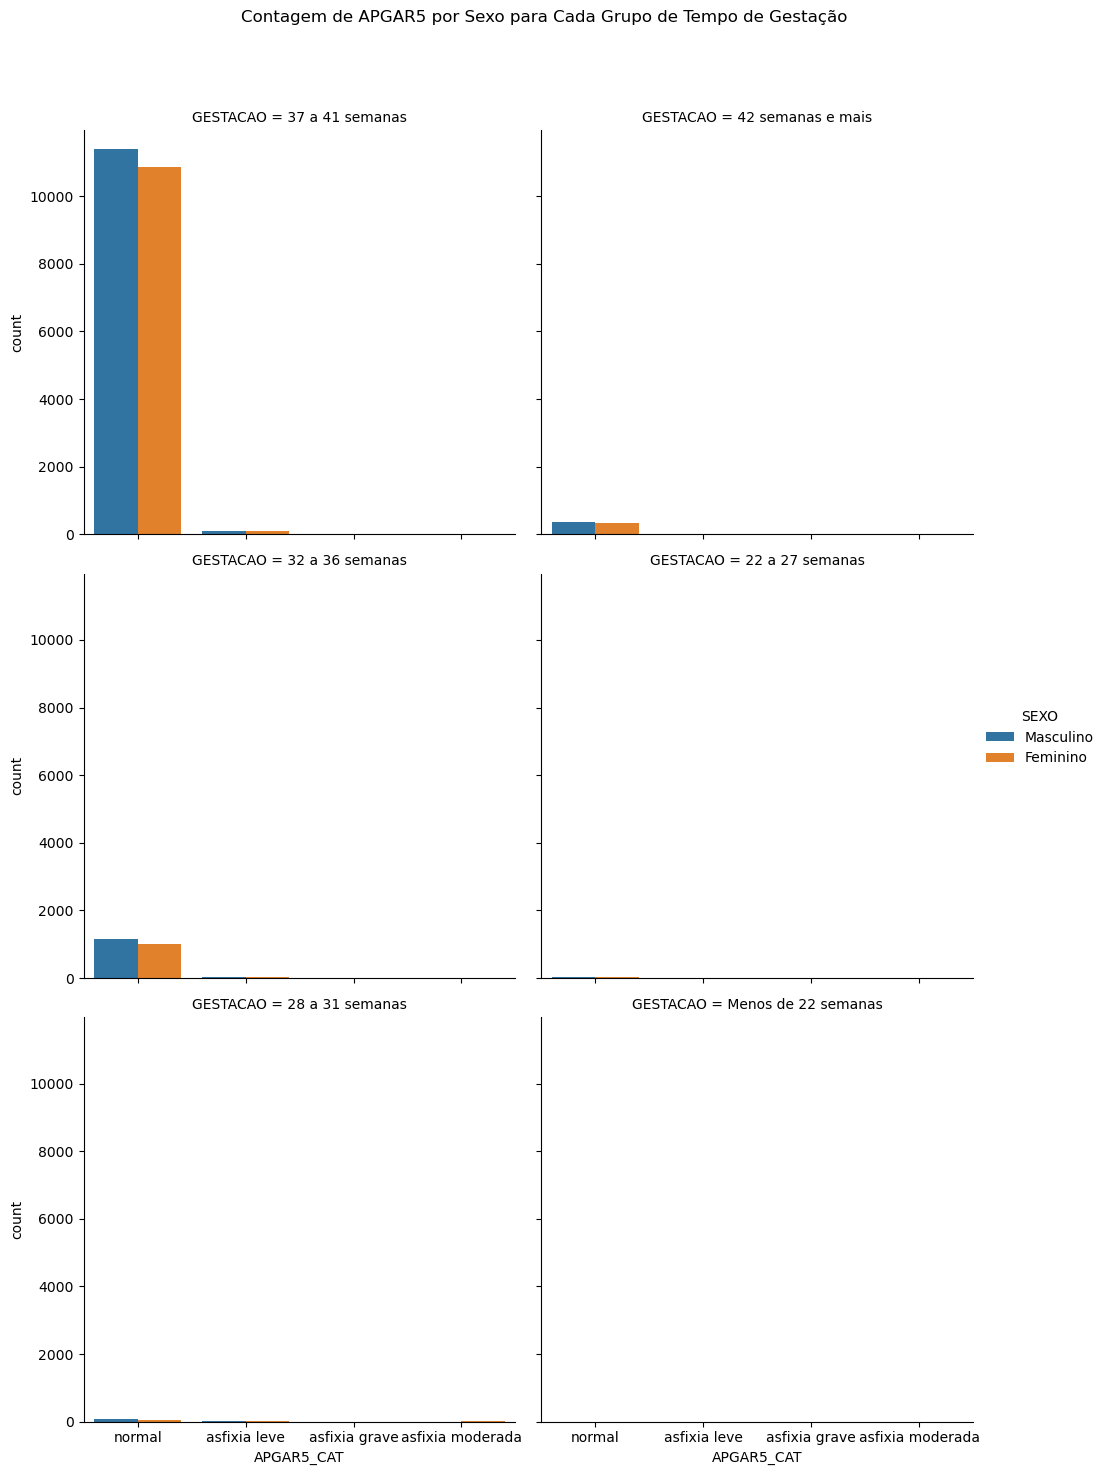

In [99]:

g = sns.catplot(x='APGAR5_CAT'
               ,kind='count'
               ,hue='SEXO'
               ,data=df
               ,col='GESTACAO'
               ,col_wrap=2
                )

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Contagem de APGAR5 por Sexo para Cada Grupo de Tempo de Gestação')

plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [84]:
f = pd.crosstab(df['GESTACAO'], df['APGAR5_CAT'])
f

APGAR5_CAT,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [87]:
f_pct=f.div(f.sum(axis=1), axis=0)
f_pct

APGAR5_CAT,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

Text(0.5, 1.0, 'Porcentagem de frequencia do APGAR5 x Gestação')

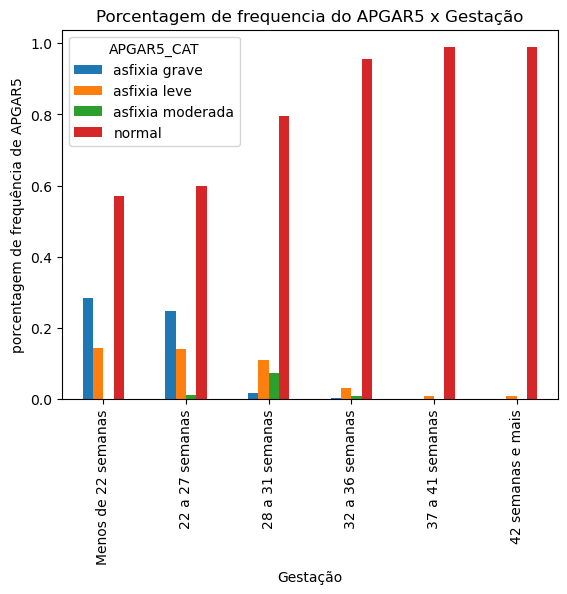

In [96]:
categorias_ordenadas = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']
f_pct = f_pct.reindex(categorias_ordenadas)

f_pct.plot.bar()

plt.xlabel('Gestação')
plt.ylabel('porcentagem de frequência de APGAR5')
plt.title('Porcentagem de frequencia do APGAR5 x Gestação')

#Conclusão
#Sim os dados corroboram com a afirmação do médico, pois a partir dos 37 semanas perecebemos nitidamente que os bebes nascem com menos chance de ter asfixia. A maioria dos bebes nascem normal.
#Portanto os bebes que nascem antes 28 a 31 semanas tem maior risco de nascerem com asfixia grave. 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5_CAT', ylabel='PESO'>

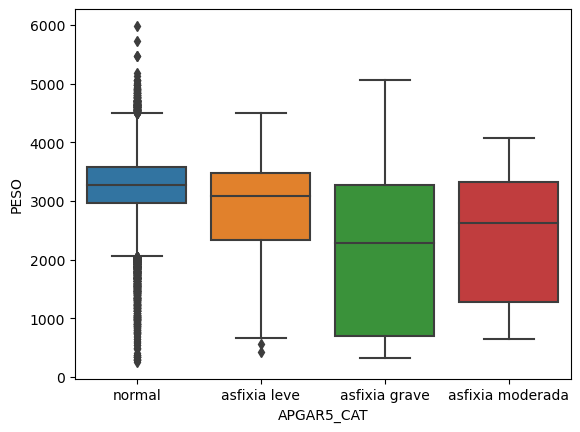

In [104]:
sns.boxplot(x='APGAR5_CAT', y='PESO', data=df)

<Axes: xlabel='APGAR5_CAT', ylabel='PESO'>

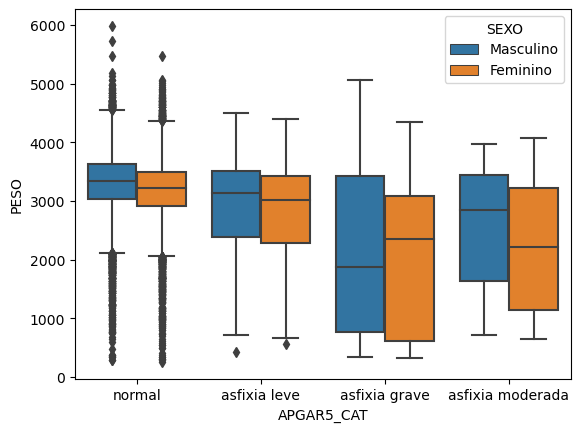

In [109]:
sns.boxplot(x='APGAR5_CAT', y='PESO', hue='SEXO', data=df)

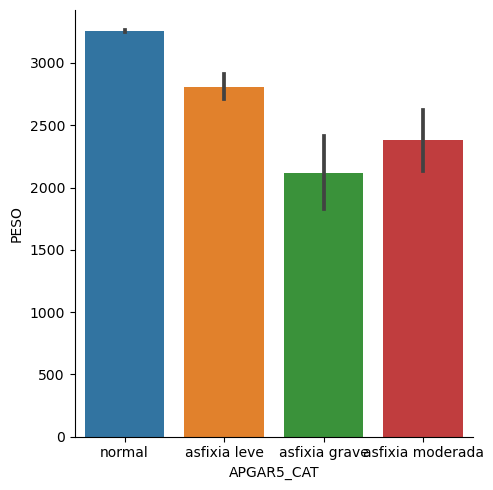

In [107]:
sns.catplot(x='APGAR5_CAT', y='PESO', kind='bar', data=df)

In [ ]:
#Quais gráficos popderiam ser?